In [5]:
!pip install matplotlib

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [7]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [8]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [9]:
dataset =tf.keras.utils.image_dataset_from_directory( 
    "PlantVillage" ,
    shuffle= True ,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

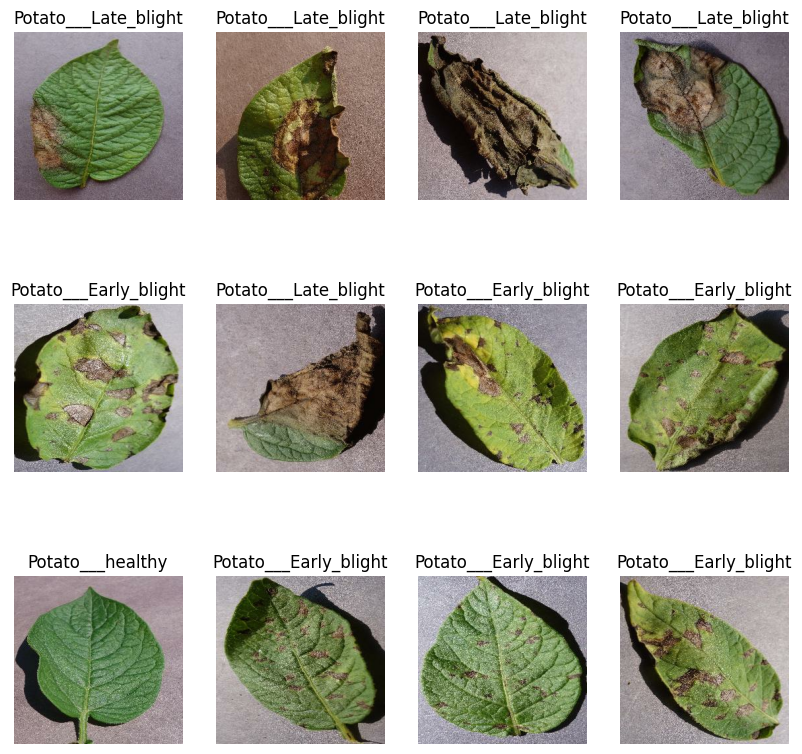

In [12]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):  
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [13]:
len(dataset)

68

In [14]:
68*32

2176

In [15]:
# 80% training data 
# 20% --> 10% validation data 10% test data

In [16]:
train_size=0.8
len(dataset)*train_size


54.400000000000006

In [17]:
train_ds=dataset.take(54)
len(train_ds)

54

In [18]:
test_ds=dataset.skip(54) 
len(test_ds)

14

In [19]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [20]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [21]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [22]:
def get_dateset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_ds=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size , seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = get_dateset_partitions_tf(dataset)

In [24]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

8

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
     layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [29]:
data_argumentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2),
])


In [30]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_argumentation,
    layers.Conv2D(32, (3, 3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), 
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 77s 1s/step - loss: 0.9036 - accuracy: 0.4988 - val_loss: 0.9498 - val_accuracy: 0.4219
Epoch 2/50
54/54 [==============================] - 60s 1s/step - loss: 0.7291 - accuracy: 0.6626 - val_loss: 0.7011 - val_accuracy: 0.6979
Epoch 3/50
54/54 [==============================] - 72s 1s/step - loss: 0.5193 - accuracy: 0.7818 - val_loss: 0.5394 - val_accuracy: 0.7656
Epoch 4/50
54/54 [==============================] - 70s 1s/step - loss: 0.3117 - accuracy: 0.8848 - val_loss: 0.2858 - val_accuracy: 0.8594
Epoch 5/50
54/54 [==============================] - 61s 1s/step - loss: 0.2869 - accuracy: 0.8750 - val_loss: 0.3322 - val_accuracy: 0.8750
Epoch 6/50
54/54 [==============================] - 65s 1s/step - loss: 0.2187 - accuracy: 0.9178 - val_loss: 0.5406 - val_accuracy: 0.7760
Epoch 7/50
54/54 [==============================] - 61s 1s/step - loss: 0.1380 - accuracy: 0.9444 - val_loss: 0.3147 - val_accuracy: 0.8542
Epoch 8/50
54/54 [==

Epoch 42/50
54/54 [==============================] - 64s 1s/step - loss: 0.0816 - accuracy: 0.9664 - val_loss: 0.4964 - val_accuracy: 0.8490
Epoch 43/50
54/54 [==============================] - 64s 1s/step - loss: 0.0247 - accuracy: 0.9925 - val_loss: 0.1556 - val_accuracy: 0.9479
Epoch 44/50
54/54 [==============================] - 67s 1s/step - loss: 0.0102 - accuracy: 0.9959 - val_loss: 0.0525 - val_accuracy: 0.9896
Epoch 45/50
54/54 [==============================] - 62s 1s/step - loss: 0.0157 - accuracy: 0.9931 - val_loss: 0.3395 - val_accuracy: 0.9219
Epoch 46/50
54/54 [==============================] - 66s 1s/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.1370 - val_accuracy: 0.9583
Epoch 47/50
54/54 [==============================] - 64s 1s/step - loss: 0.0253 - accuracy: 0.9896 - val_loss: 0.3288 - val_accuracy: 0.8854
Epoch 48/50
54/54 [==============================] - 67s 1s/step - loss: 0.0628 - accuracy: 0.9780 - val_loss: 0.1283 - val_accuracy: 0.9583
Epoch 49/50
5

In [34]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 275ms/step - loss: 0.0499 - accuracy: 0.9844


In [35]:
scores

[0.04989463835954666, 0.984375]

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

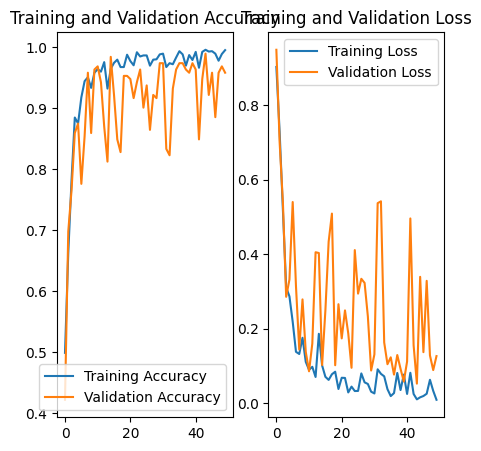

In [38]:
plt.figure(figsize= (5, 5))
plt.subplot(1, 2, 1)
plt.plot(range (EPOCHS), acc, label='Training Accuracy')
plt.plot(range (EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range (EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend (loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 545ms/step
predicted label: Potato___Late_blight


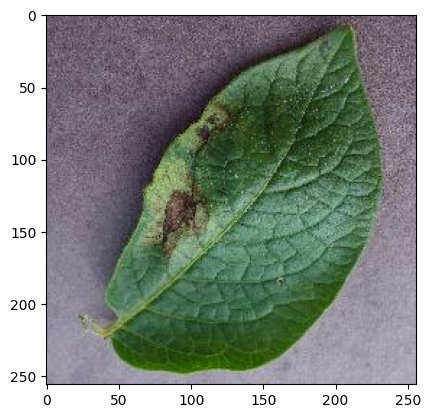

In [39]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
     
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict (images_batch)
    print ("predicted label:", class_names [np.argmax(batch_prediction [0])])

In [40]:
def predict (model, img) :
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict (img_array)

    predicted_class = class_names[np.argmax(predictions [0])]
    confidence = round(100 * (np. max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


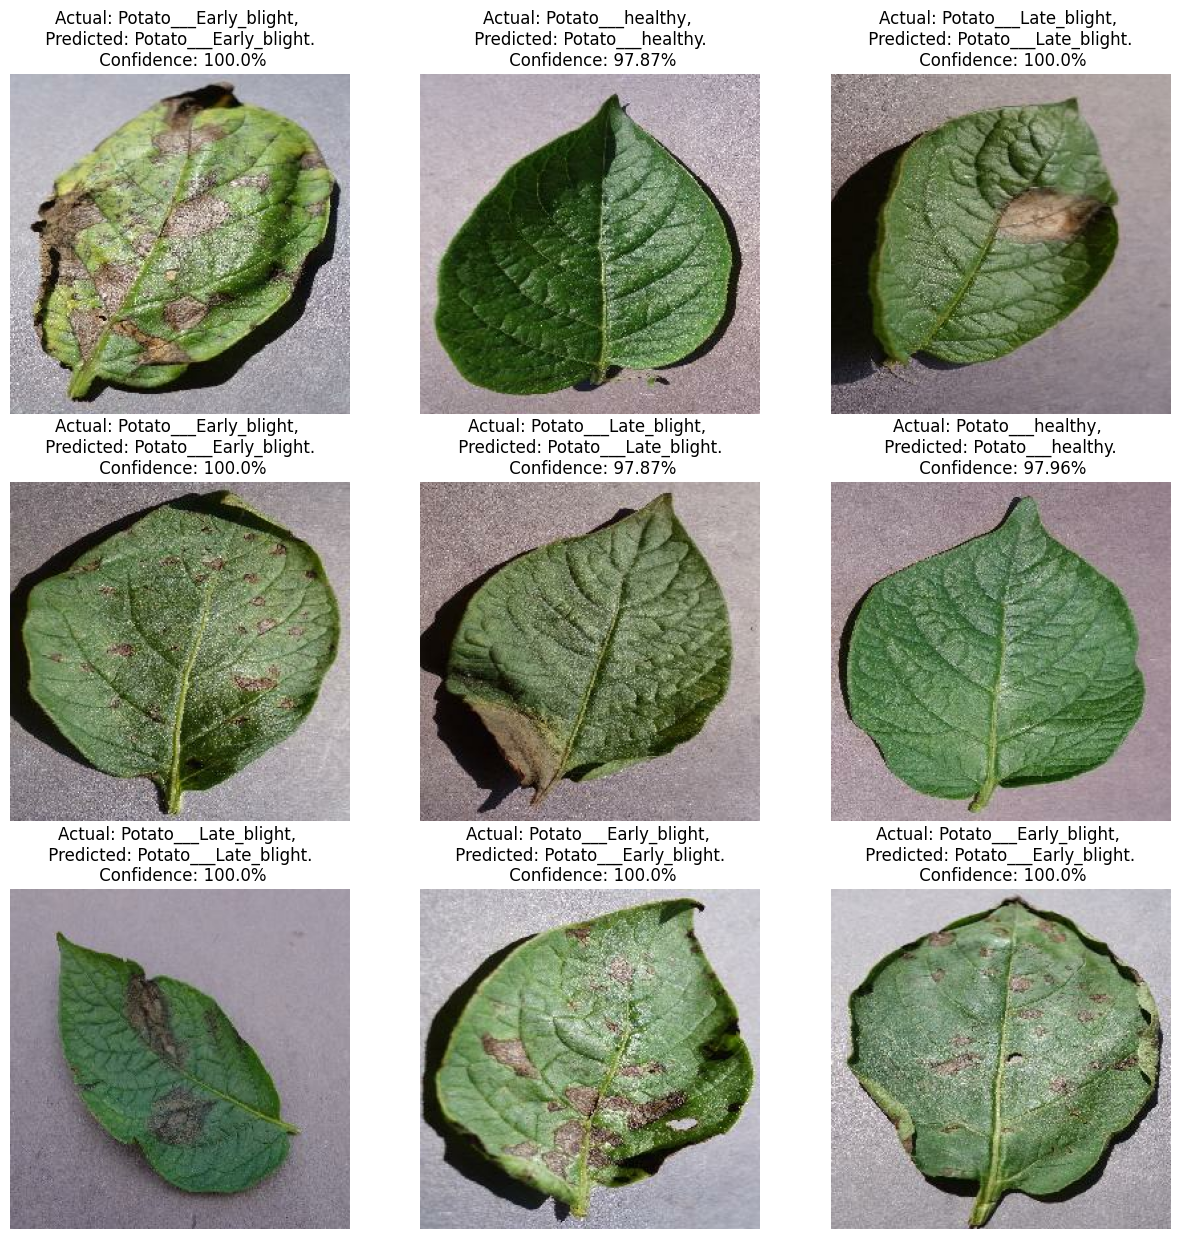

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot (3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images [i].numpy ())
        actual_class = class_names[labels [i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        
        plt.axis("off")

In [42]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
